In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", family="Malgun Gothic")

In [2]:
df = pd.read_csv('data/주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20230630.csv', encoding='ms949')
df

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879
...,...,...,...,...,...
7900,제주,모든면적,2023,6,7326
7901,제주,전용면적 60제곱미터이하,2023,6,7381
7902,제주,전용면적 60제곱미터초과 85제곱미터이하,2023,6,7084
7903,제주,전용면적 85제곱미터초과 102제곱미터이하,2023,6,6639


In [3]:
df2 = df.copy()

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   지역명         7905 non-null   object
 1   규모구분        7905 non-null   object
 2   연도          7905 non-null   int64 
 3   월           7905 non-null   int64 
 4   분양가격(제곱미터)  7358 non-null   object
dtypes: int64(2), object(3)
memory usage: 308.9+ KB


In [6]:
df2.isna().sum()

지역명             0
규모구분            0
연도              0
월               0
분양가격(제곱미터)    547
dtype: int64

In [7]:
df2['분양가격']=pd.to_numeric(df2['분양가격(제곱미터)'], errors='coerce')
df2['분양가격']

0       5841.0
1       5652.0
2       5882.0
3       5721.0
4       5879.0
         ...  
7900    7326.0
7901    7381.0
7902    7084.0
7903    6639.0
7904    7506.0
Name: 분양가격, Length: 7905, dtype: float64

### 평당 분양가격
    분양가격 * 3.3
        1제곱미터 * 3.3 = 3.3평
  

In [8]:
df2['평당 분양가격'] = df2['분양가격']*3.3

In [9]:
df2.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),분양가격,평당 분양가격
0,서울,모든면적,2015,10,5841,5841.0,19275.3
1,서울,전용면적 60제곱미터이하,2015,10,5652,5652.0,18651.6
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882,5882.0,19410.6
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721,5721.0,18879.3
4,서울,전용면적 102제곱미터초과,2015,10,5879,5879.0,19400.7


In [12]:
df2[df2['지역명'] == '서울']

,지역명,규모구분,연도,월,분양가격(제곱미터),분양가격,평당 분양가격
0,서울,모든면적,2015,10,5841,5841.0,19275.3
1,서울,전용면적 60제곱미터이하,2015,10,5652,5652.0,18651.6
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882,5882.0,19410.6
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721,5721.0,18879.3
4,서울,전용면적 102제곱미터초과,2015,10,5879,5879.0,19400.7
...,...,...,...,...,...,...,...
7820,서울,모든면적,2023,6,9675,9675.0,31927.5
7821,서울,전용면적 60제곱미터이하,2023,6,9555,9555.0,31531.5
7822,서울,전용면적 60제곱미터초과 85제곱미터이하,2023,6,9325,9325.0,30772.5
7823,서울,전용면적 85제곱미터초과 102제곱미터이하,2023,6,10057,10057.0,33188.1


In [13]:
df2['분양가격(제곱미터)'].unique()

array(['5841', '5652', '5882', ..., '7326', '7084', '7506'], dtype=object)

In [14]:
df2['분양가격(제곱미터)'].nunique()

2766

In [15]:
df2['분양가격(제곱미터)'].value_counts()

분양가격(제곱미터)
        31
3395    20
3226    17
2657    17
2221    17
        ..
5332     1
4185     1
4411     1
7683     1
7506     1
Name: count, Length: 2766, dtype: int64

In [16]:
df2['분양가격(제곱미터)'].describe()

count     7358
unique    2766
top           
freq        31
Name: 분양가격(제곱미터), dtype: object

In [17]:
df2['규모구분'].unique()

array(['모든면적', '전용면적 60제곱미터이하', '전용면적 60제곱미터초과 85제곱미터이하',
       '전용면적 85제곱미터초과 102제곱미터이하', '전용면적 102제곱미터초과'], dtype=object)

In [23]:
df2['전용면적'] = df2['규모구분'].str.replace('전용면적', "")
df2['전용면적'] = df2['전용면적'].str.replace('이하', "")
df2['전용면적'] = df2['전용면적'].str.replace('초과', "-")
df2['전용면적'] = df2['전용면적'].str.replace(' ', "")
df2['전용면적'] = df2['전용면적'].str.strip()
df2

,지역명,규모구분,연도,월,분양가격(제곱미터),분양가격,평당 분양가격,전용면적
0,서울,모든면적,2015,10,5841,5841.0,19275.3,모든면적
1,서울,전용면적 60제곱미터이하,2015,10,5652,5652.0,18651.6,60제곱미터
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882,5882.0,19410.6,60제곱미터-85제곱미터
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721,5721.0,18879.3,85제곱미터-102제곱미터
4,서울,전용면적 102제곱미터초과,2015,10,5879,5879.0,19400.7,102제곱미터-
...,...,...,...,...,...,...,...,...
7900,제주,모든면적,2023,6,7326,7326.0,24175.8,모든면적
7901,제주,전용면적 60제곱미터이하,2023,6,7381,7381.0,24357.3,60제곱미터
7902,제주,전용면적 60제곱미터초과 85제곱미터이하,2023,6,7084,7084.0,23377.2,60제곱미터-85제곱미터
7903,제주,전용면적 85제곱미터초과 102제곱미터이하,2023,6,6639,6639.0,21908.7,85제곱미터-102제곱미터


In [24]:
df2['전용면적']

0                 모든면적
1               60제곱미터
2        60제곱미터-85제곱미터
3       85제곱미터-102제곱미터
4             102제곱미터-
             ...      
7900              모든면적
7901            60제곱미터
7902     60제곱미터-85제곱미터
7903    85제곱미터-102제곱미터
7904          102제곱미터-
Name: 전용면적, Length: 7905, dtype: object

In [26]:
df2.drop(['규모구분', '분양가격'], axis = 1, inplace=True)
df2

,지역명,연도,월,분양가격(제곱미터),평당 분양가격,전용면적
0,서울,2015,10,5841,19275.3,모든면적
1,서울,2015,10,5652,18651.6,60제곱미터
2,서울,2015,10,5882,19410.6,60제곱미터-85제곱미터
3,서울,2015,10,5721,18879.3,85제곱미터-102제곱미터
4,서울,2015,10,5879,19400.7,102제곱미터-
...,...,...,...,...,...,...
7900,제주,2023,6,7326,24175.8,모든면적
7901,제주,2023,6,7381,24357.3,60제곱미터
7902,제주,2023,6,7084,23377.2,60제곱미터-85제곱미터
7903,제주,2023,6,6639,21908.7,85제곱미터-102제곱미터


In [31]:
group_region_year = df2.groupby(['지역명', '연도'])
group_region_year['평당 분양가격'].mean()

지역명  연도  
강원   2015     7188.060000
     2016     7162.903846
     2017     7318.850000
     2018     8219.255000
     2019     8934.475000
                 ...     
충북   2019     7970.875000
     2020     8358.956897
     2021     8822.385000
     2022    10033.540000
     2023    10791.990000
Name: 평당 분양가격, Length: 153, dtype: float64

In [32]:
group_region_year

In [33]:
pd.pivot_table(df2, index=['전용면적'], values=['평당 분양가격'])

,평당 분양가격
전용면적,
102제곱미터-,13152.676793
60제곱미터,11859.274417
60제곱미터-85제곱미터,11895.030518
85제곱미터-102제곱미터,12750.729685
모든면적,11923.028544


In [34]:
df2.pivot_table(index=['전용면적'], columns=['지역명'], values=['평당 분양가격']).round()

평당 분양가격                                                        \
지역명                  강원       경기       경남       경북       광주       대구       대전   
전용면적                                                                            
102제곱미터-        10503.0  15778.0  10968.0  10524.0  13880.0  15059.0  15138.0   
60제곱미터           8816.0  14381.0   9750.0   9104.0  11124.0  13606.0  11035.0   
60제곱미터-85제곱미터    8637.0  13819.0   9642.0   9270.0  11779.0  13669.0  11112.0   
85제곱미터-102제곱미터   9802.0  14976.0  12009.0  10539.0  11587.0  13484.0   9078.0   
모든면적             8795.0  13856.0   9689.0   9297.0  11903.0  13660.0  11160.0   

                                                                             \
지역명                  부산       서울       세종       울산       인천      전남      전북   
전용면적                                                                          
102제곱미터-        14352.0  26611.0  10685.0  14039.0  15697.0  9577.0  8988.0   
60제곱미터          13355.0  26281.0  10514.0  12849.0  13070.0  8403.0  8152.0   
60제곱미터-85제곱미터   13705.0  25522.0  10599.0  12880.0  13128.0  8417.0  8146.0   
85제곱미터-102제곱미터  13459.0  27591.0  10600.0  14132.0  14021.0  8808.0  8986.0   
모든면적            13731.0  25569.0  10675.0  12823.0  13139.0  8443.0  8181.0   

                                          
지역명                  제주       충남      충북  
전용면적                                      
102제곱미터-        15013.0   9825.0  8888.0  
60제곱미터          14591.0   8747.0  8038.0  
60제곱미터-85제곱미터   14778.0   9005.0  8078.0  
85제곱미터-102제곱미터  14548.0  10395.0  8928.0  
모든면적            15024.0   8717.0  8038.0

In [35]:
p = pd.pivot_table(df2, index=['연도', '전용면적'], columns=['지역명'], values=['평당 분양가격']).round()
p

평당 분양가격                                               \
지역명                       강원       경기       경남       경북       광주       대구   
연도   전용면적                                                                   
2015 102제곱미터-         7164.0  12379.0   9984.0   7658.0      NaN   8892.0   
     60제곱미터           7557.0  10448.0   7391.0   7251.0   7589.0   9239.0   
     60제곱미터-85제곱미터    7258.0  10730.0   7652.0   7166.0   8109.0   9320.0   
     85제곱미터-102제곱미터   6801.0  11370.0   9684.0   8074.0      NaN   8411.0   
     모든면적             7160.0  10377.0   7586.0   7171.0   8052.0   9232.0   
2016 102제곱미터-         7590.0  13136.0   8911.0   8075.0  11114.0  10550.0   
     60제곱미터           7044.0  11744.0   7991.0   7213.0   8354.0  10930.0   
     60제곱미터-85제곱미터    7093.0  11236.0   7849.0   7396.0   8919.0  10372.0   
     85제곱미터-102제곱미터   6906.0  11089.0   9885.0   8722.0   9134.0   9248.0   
     모든면적             7011.0  11220.0   7848.0   7361.0   8899.0  10310.0   
2017 102제곱미터-         7877.0  13621.0   9247.0   9031.0  10558.0  14869.0   
     60제곱미터           7115.0  12374.0   8539.0   7904.0   8645.0  11817.0   
     60제곱미터-85제곱미터    7157.0  11737.0   8109.0   7778.0   9459.0  11513.0   
     85제곱미터-102제곱미터   7275.0  11908.0   9974.0   9052.0   9442.0  10316.0   
     모든면적             7171.0  11841.0   8164.0   7803.0   9471.0  11507.0   
2018 102제곱미터-         8770.0  15271.0   9737.0   9442.0   8622.0  12846.0   
     60제곱미터           7693.0  14397.0   9266.0   8264.0   9548.0  12141.0   
     60제곱미터-85제곱미터    7668.0  13157.0   8940.0   8478.0   9856.0  12079.0   
     85제곱미터-102제곱미터   9284.0  15281.0   9677.0   8784.0      NaN  11360.0   
     모든면적             7681.0  13186.0   9019.0   8505.0   9856.0  12076.0   
2019 102제곱미터-         9359.0  17535.0  13840.0  10514.0  14209.0  15082.0   
     60제곱미터           8406.0  15114.0   9434.0   8315.0  11286.0  13722.0   
     60제곱미터-85제곱미터    8093.0  14338.0   9810.0   8800.0  11827.0  13789.0   
     85제곱미터-102제곱미터  10673.0  16872.0  10584.0   8765.0      NaN  13963.0   
     모든면적             8142.0  14469.0   9871.0   8857.0  11823.0  13852.0   
2020 102제곱미터-        13374.0  15983.0  10039.0  10162.0  14558.0  16282.0   
     60제곱미터           9769.0  14590.0   9547.0  10251.0  12844.0  14788.0   
     60제곱미터-85제곱미터    9209.0  14323.0  10154.0   9528.0  12519.0  15137.0   
     85제곱미터-102제곱미터   9592.0  16251.0  14257.0  12178.0  15213.0  15220.0   
     모든면적             9331.0  14383.0  10161.0   9545.0  12500.0  15145.0   
2021 102제곱미터-        12092.0  16617.0  11132.0  12697.0  15591.0  16439.0   
     60제곱미터          10296.0  13696.0  10168.0   9850.0  11461.0  15148.0   
     60제곱미터-85제곱미터    9556.0  14223.0  10449.0  10294.0  13266.0  15607.0   
     85제곱미터-102제곱미터   9796.0  14117.0  14257.0  12961.0  15213.0  15180.0   
     모든면적             9717.0  14183.0  10505.0  10333.0  14021.0  15558.0   
2022 102제곱미터-        13481.0  16300.0  12676.0  12908.0  17064.0  18363.0   
     60제곱미터          10707.0  16902.0  11814.0  10795.0  13099.0  15916.0   
     60제곱미터-85제곱미터   10363.0  16261.0  11646.0  11535.0  15236.0  16506.0   
     85제곱미터-102제곱미터  12741.0  17332.0  14419.0  13247.0      NaN  16816.0   
     모든면적            10929.0  16312.0  11724.0  11606.0  15148.0  16508.0   
2023 102제곱미터-        14122.0  21447.0  13394.0  13452.0  21509.0  20101.0   
     60제곱미터          10812.0  20043.0  13811.0  12301.0  16083.0  17352.0   
     60제곱미터-85제곱미터   11962.0  18276.0  11708.0  12476.0  16352.0  17206.0   
     85제곱미터-102제곱미터  11997.0  20740.0  15192.0  11524.0      NaN  16357.0   
     모든면적            12776.0  18393.0  11807.0  12500.0  17033.0  17206.0   

                                                                           \
지역명                       대전       부산       서울       세종       울산       인천   
연도   전용면적                                                                   
2015 102제곱미터-            NaN  12076.0  20879.0   9012.0   9282.0  11246.0   
     60제곱미터     

In [36]:
p.loc[2022]

평당 분양가격                                                        \
지역명                  강원       경기       경남       경북       광주       대구       대전   
전용면적                                                                            
102제곱미터-        13481.0  16300.0  12676.0  12908.0  17064.0  18363.0  14169.0   
60제곱미터          10707.0  16902.0  11814.0  10795.0  13099.0  15916.0  14278.0   
60제곱미터-85제곱미터   10363.0  16261.0  11646.0  11535.0  15236.0  16506.0  14012.0   
85제곱미터-102제곱미터  12741.0  17332.0  14419.0  13247.0      NaN  16816.0      NaN   
모든면적            10929.0  16312.0  11724.0  11606.0  15148.0  16508.0  14010.0   

                                                                               \
지역명                  부산       서울       세종       울산       인천       전남       전북   
전용면적                                                                            
102제곱미터-        19847.0  29946.0  11471.0  21552.0  18511.0  11230.0  10502.0   
60제곱미터          17297.0  30710.0  10671.0  16434.0  15795.0  11176.0   9186.0   
60제곱미터-85제곱미터   18047.0  29845.0  10984.0  17484.0  15890.0  10215.0   9857.0   
85제곱미터-102제곱미터  17865.0  24766.0  12771.0  17267.0  20386.0  10189.0  10585.0   
모든면적            17918.0  29648.0  11397.0  17390.0  16127.0  10331.0   9886.0   

                                           
지역명                  제주       충남       충북  
전용면적                                       
102제곱미터-        21628.0  12362.0  10337.0  
60제곱미터          11930.0  10384.0  10022.0  
60제곱미터-85제곱미터   19939.0  12300.0   9698.0  
85제곱미터-102제곱미터  20494.0  13276.0  10416.0  
모든면적            20778.0  10329.0   9694.0

In [5]:
df_1 = pd.read_csv('data/PRDTF_202402160149525600.csv', encoding='ms949')
df_1.head()

,house_mnnmb,house_nm,spl_loca,spl_scale,ovhspz_yn,regtare_yn,prceilsys_yn,rebdproj_yn,pubhusdist_yn,lrscl_hussdedist_yn,...,specl_spl_hh_cnt,mltchdrn_hshld_cnt,nwwds_hshld_cnt,lfe_frst_hshld_cnt,oldparnts_hshld_cnt,instt_rcmn_cnt,instt_rcmn_etc_cnt,rlct_instt_cnt,spl_amt,loan_posbl_amt
0,2020000001,SH 마곡지구 9단지,서울특별시 강서구 마곡동 744,962,Y,Y,Y,N,N,N,...,315,43,130,87,21,31,3,0,52515,26257.5
1,2020000001,SH 마곡지구 9단지,서울특별시 강서구 마곡동 744,962,Y,Y,Y,N,N,N,...,355,48,143,95,24,34,11,0,69750,34875.0
2,2020000001,SH 마곡지구 9단지,서울특별시 강서구 마곡동 744,962,Y,Y,Y,N,N,N,...,40,5,15,10,3,7,0,0,67124,33562.0
3,2020000005,경북도청신도시 코오롱하늘채,경상북도 안동시 풍천면 갈전리 1177,869,N,N,N,N,N,N,...,60,3,8,8,2,8,0,31,6100,3660.0
4,2020000005,경북도청신도시 코오롱하늘채,경상북도 안동시 풍천면 갈전리 1177,869,N,N,N,N,N,N,...,15,1,2,2,0,2,0,8,7600,4560.0


In [7]:
df_1_daegu = df_1[df_1['spl_loca'].str.contains('대구광역시')]
df_1_daegu.head()

,house_mnnmb,house_nm,spl_loca,spl_scale,ovhspz_yn,regtare_yn,prceilsys_yn,rebdproj_yn,pubhusdist_yn,lrscl_hussdedist_yn,...,specl_spl_hh_cnt,mltchdrn_hshld_cnt,nwwds_hshld_cnt,lfe_frst_hshld_cnt,oldparnts_hshld_cnt,instt_rcmn_cnt,instt_rcmn_etc_cnt,rlct_instt_cnt,spl_amt,loan_posbl_amt
86,2020000123,청라힐스자이,대구광역시 중구 남산4동 2478번지 일원,656,N,N,N,N,N,N,...,2,2,0,0,0,0,0,0,60970,36582.0
87,2020000123,청라힐스자이,대구광역시 중구 남산4동 2478번지 일원,656,N,N,N,N,N,N,...,44,10,21,0,3,10,0,0,36790,22074.0
88,2020000123,청라힐스자이,대구광역시 중구 남산4동 2478번지 일원,656,N,N,N,N,N,N,...,78,18,37,0,5,18,0,0,51520,30912.0
89,2020000123,청라힐스자이,대구광역시 중구 남산4동 2478번지 일원,656,N,N,N,N,N,N,...,86,20,40,0,6,20,0,0,51510,30906.0
90,2020000123,청라힐스자이,대구광역시 중구 남산4동 2478번지 일원,656,N,N,N,N,N,N,...,5,1,3,0,0,1,0,0,50970,30582.0


In [8]:
df_1_daegu.columns

Index(['house_mnnmb', 'house_nm', 'spl_loca', 'spl_scale', 'ovhspz_yn',
       'regtare_yn', 'prceilsys_yn', 'rebdproj_yn', 'pubhusdist_yn',
       'lrscl_hussdedist_yn', 'npln_prvpubhus_yn', 'model_no', 'house_stl',
       'splyar', 'gnrl_spl_hh_cnt', 'specl_spl_hh_cnt', 'mltchdrn_hshld_cnt',
       'nwwds_hshld_cnt', 'lfe_frst_hshld_cnt', 'oldparnts_hshld_cnt',
       'instt_rcmn_cnt', 'instt_rcmn_etc_cnt', 'rlct_instt_cnt', 'spl_amt',
       'loan_posbl_amt'],
      dtype='object')

In [10]:
df_2_daegu = df_1_daegu.drop(['house_mnnmb', 'ovhspz_yn', 'regtare_yn', 'prceilsys_yn', 'rebdproj_yn', 'pubhusdist_yn', 'lrscl_hussdedist_yn', 'npln_prvpubhus_yn','gnrl_spl_hh_cnt', 'specl_spl_hh_cnt', 'mltchdrn_hshld_cnt', 'nwwds_hshld_cnt', 'lfe_frst_hshld_cnt', 'oldparnts_hshld_cnt', 'instt_rcmn_cnt', 'instt_rcmn_etc_cnt', 'rlct_instt_cnt',], axis = 1)
df_2_daegu

,house_nm,spl_loca,spl_scale,model_no,house_stl,splyar,spl_amt,loan_posbl_amt
86,청라힐스자이,대구광역시 중구 남산4동 2478번지 일원,656,6,101.4727,129.6898,60970,36582.0
87,청라힐스자이,대구광역시 중구 남산4동 2478번지 일원,656,1,059.8861,77.3309,36790,22074.0
88,청라힐스자이,대구광역시 중구 남산4동 2478번지 일원,656,5,084.9892C,109.6953,51520,30912.0
89,청라힐스자이,대구광역시 중구 남산4동 2478번지 일원,656,3,084.8688A,108.2567,51510,30906.0
90,청라힐스자이,대구광역시 중구 남산4동 2478번지 일원,656,4,084.8634B,108.1984,50970,30582.0
...,...,...,...,...,...,...,...,...
8183,대실역 블루핀34,대구광역시 달성군 다사읍 왕선로1길 20,34,3,084.5888C,104.5829,48500,29100.0
8184,대실역 블루핀34,대구광역시 달성군 다사읍 왕선로1길 20,34,2,084.6028B,104.2224,45500,27300.0
9462,반고개역 푸르지오,"대구광역시 서구 큰장로7길 11 (내당동, 반고개역 푸르지오)",240,3,157.3430,206.3913,170000,102000.0
9463,반고개역 푸르지오,"대구광역시 서구 큰장로7길 11 (내당동, 반고개역 푸르지오)",240,1,084.8648A,110.9270,73900,44340.0


In [18]:
df_2_daegu['구'] = df_2_daegu['spl_loca'].apply(lambda x : x.split(' ', 2)[1])

In [19]:
df_2_daegu.head()

,house_nm,spl_loca,spl_scale,model_no,house_stl,splyar,spl_amt,loan_posbl_amt,구
86,청라힐스자이,대구광역시 중구 남산4동 2478번지 일원,656,6,101.4727,129.6898,60970,36582.0,중구
87,청라힐스자이,대구광역시 중구 남산4동 2478번지 일원,656,1,059.8861,77.3309,36790,22074.0,중구
88,청라힐스자이,대구광역시 중구 남산4동 2478번지 일원,656,5,084.9892C,109.6953,51520,30912.0,중구
89,청라힐스자이,대구광역시 중구 남산4동 2478번지 일원,656,3,084.8688A,108.2567,51510,30906.0,중구
90,청라힐스자이,대구광역시 중구 남산4동 2478번지 일원,656,4,084.8634B,108.1984,50970,30582.0,중구


In [31]:
def exchange_house_stl(x):
    if x.isnumeric():
        pass
    else:
        x = x[:-1]
    x = float(x)/10 * 3
    return x

df_2_daegu['공급면적 평수'] = df_2_daegu['splyar']/10 * 3
df_2_daegu['전용면적 평수'] = df_2_daegu['house_stl'].apply(exchange_house_stl)
df_2_daegu

,house_nm,spl_loca,spl_scale,model_no,house_stl,splyar,spl_amt,loan_posbl_amt,구,공급면적 평수,전용면적 평수
86,청라힐스자이,대구광역시 중구 남산4동 2478번지 일원,656,6,101.4727,129.6898,60970,36582.0,중구,38.90694,30.44181
87,청라힐스자이,대구광역시 중구 남산4동 2478번지 일원,656,1,059.8861,77.3309,36790,22074.0,중구,23.19927,17.96583
88,청라힐스자이,대구광역시 중구 남산4동 2478번지 일원,656,5,084.9892C,109.6953,51520,30912.0,중구,32.90859,25.49676
89,청라힐스자이,대구광역시 중구 남산4동 2478번지 일원,656,3,084.8688A,108.2567,51510,30906.0,중구,32.47701,25.46064
90,청라힐스자이,대구광역시 중구 남산4동 2478번지 일원,656,4,084.8634B,108.1984,50970,30582.0,중구,32.45952,25.45902
...,...,...,...,...,...,...,...,...,...,...,...
8183,대실역 블루핀34,대구광역시 달성군 다사읍 왕선로1길 20,34,3,084.5888C,104.5829,48500,29100.0,달성군,31.37487,25.37664
8184,대실역 블루핀34,대구광역시 달성군 다사읍 왕선로1길 20,34,2,084.6028B,104.2224,45500,27300.0,달성군,31.26672,25.38084
9462,반고개역 푸르지오,"대구광역시 서구 큰장로7길 11 (내당동, 반고개역 푸르지오)",240,3,157.3430,206.3913,170000,102000.0,서구,61.91739,47.20290
9463,반고개역 푸르지오,"대구광역시 서구 큰장로7길 11 (내당동, 반고개역 푸르지오)",240,1,084.8648A,110.9270,73900,44340.0,서구,33.27810,25.45944


In [43]:
df_2_daegu['금액(만원) -- 전용면적/공급면적 평수'] = df_2_daegu['spl_amt'].apply(int).apply(str) + '--' + df_2_daegu['전용면적 평수'].apply(int).apply(str) + '/' + df_2_daegu['공급면적 평수'].apply(int).apply(str)
df_2_daegu.head()

,house_nm,spl_loca,spl_scale,model_no,house_stl,splyar,spl_amt,loan_posbl_amt,구,공급면적 평수,전용면적 평수,금액(만원) -- 전용면적/공급면적 평수
86,청라힐스자이,대구광역시 중구 남산4동 2478번지 일원,656,6,101.4727,129.6898,60970,36582.0,중구,38.90694,30.44181,60970--30/38
87,청라힐스자이,대구광역시 중구 남산4동 2478번지 일원,656,1,059.8861,77.3309,36790,22074.0,중구,23.19927,17.96583,36790--17/23
88,청라힐스자이,대구광역시 중구 남산4동 2478번지 일원,656,5,084.9892C,109.6953,51520,30912.0,중구,32.90859,25.49676,51520--25/32
89,청라힐스자이,대구광역시 중구 남산4동 2478번지 일원,656,3,084.8688A,108.2567,51510,30906.0,중구,32.47701,25.46064,51510--25/32
90,청라힐스자이,대구광역시 중구 남산4동 2478번지 일원,656,4,084.8634B,108.1984,50970,30582.0,중구,32.45952,25.45902,50970--25/32


<Axes: xlabel='구'>

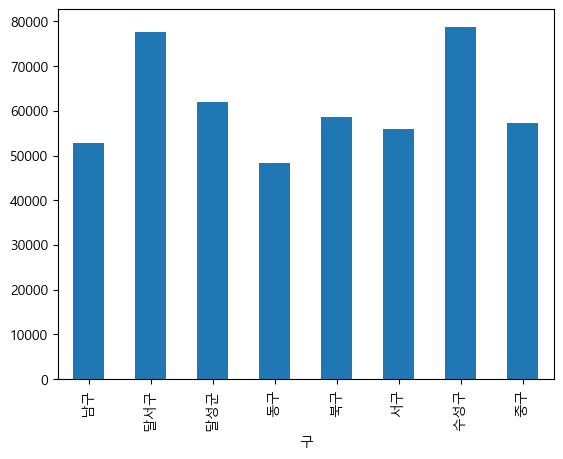

In [61]:
df_2_daegu_grouped = df_2_daegu.groupby('구')
df_2_daegu_grouped["spl_amt"].mean().plot.bar()

<Axes: xlabel='구'>

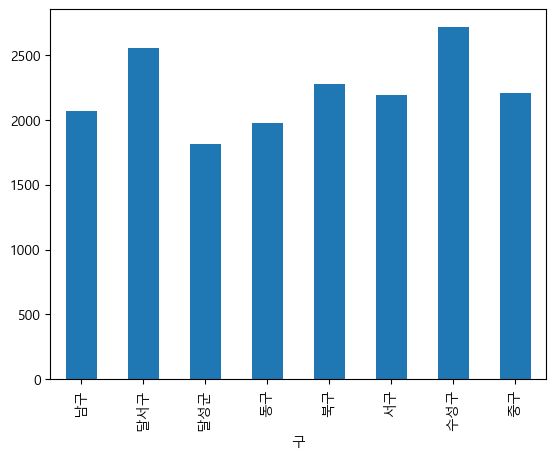

In [62]:
df_2_daegu['금액/전용면적'] = df_2_daegu['spl_amt']/df_2_daegu['전용면적 평수']
df_2_daegu_grouped = df_2_daegu.groupby('구')
df_2_daegu_grouped["금액/전용면적"].mean().plot.bar()

In [55]:
df_2_daegu[df_2_daegu['구'] == '수성구'].sort_values('spl_amt', ascending=False)

,house_nm,spl_loca,spl_scale,model_no,house_stl,splyar,spl_amt,loan_posbl_amt,구,공급면적 평수,전용면적 평수,금액(만원) -- 전용면적/공급면적 평수,금액/전용면적
7140,빌리브 헤리티지,대구광역시 수성구 수성동4가 1025-1외 105필지,146,3,175.7810,206.8883,224600,134760.0,수성구,62.06649,52.73430,224600--52/62,4259.087539
7138,빌리브 헤리티지,대구광역시 수성구 수성동4가 1025-1외 105필지,146,4,223.8675,267.0390,217100,130260.0,수성구,80.11170,67.16025,217100--67/80,3232.566883
6097,수성포레스트스위첸,대구광역시 수성구 파동로28길 11-9(파동),755,21,206.3799,272.3717,198341,99170.5,수성구,81.71151,61.91397,198341--61/81,3203.493493
6098,수성포레스트스위첸,대구광역시 수성구 파동로28길 11-9(파동),755,20,188.0502,244.9728,183243,91621.5,수성구,73.49184,56.41506,183243--56/73,3248.122044
3198,대구두산동 호반써밋 수성,"대구광역시 수성구 청수로24길 75 (두산동, 진보연립)",301,11,172.1926P,231.7524,168400,84200.0,수성구,69.52572,51.65778,168400--51/69,3259.915544
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4162,수성레이크 우방아이유쉘,대구광역시 수성구 파동 68-7번지 일원,394,1,059.9204,79.4835,35480,17740.0,수성구,23.84505,17.97612,35480--17/23,1973.729592
3201,대구두산동 호반써밋 수성,"대구광역시 수성구 청수로24길 75 (두산동, 진보연립)",301,2,042.0572B,57.7132,35400,17700.0,수성구,17.31396,12.61716,35400--12/17,2805.702710
2969,수성 해모로 하이엔,대구광역시 수성구 파동로 43-9 (파동),576,1,059.2388,78.9933,33600,16800.0,수성구,23.69799,17.77164,33600--17/23,1890.652748
3276,수성알파시티청아람 외국인전용 분양전환공공임대(10년),대구광역시 수성구 알파시티2로 96 (노변동),30,1,049.9966A,68.4024,4746,2373.0,수성구,20.52072,14.99898,4746--14/20,316.421517


In [56]:
df_2_daegu.sort_values('spl_amt', ascending=False)

,house_nm,spl_loca,spl_scale,model_no,house_stl,splyar,spl_amt,loan_posbl_amt,구,공급면적 평수,전용면적 평수,금액(만원) -- 전용면적/공급면적 평수,금액/전용면적
433,대구 월배 라온프라이빗 디엘,대구광역시 달서구 월배로33길 6 (진천동),555,9,218.3537,305.3212,240000,144000.0,달서구,91.59636,65.50611,240000--65/91,3663.780371
7140,빌리브 헤리티지,대구광역시 수성구 수성동4가 1025-1외 105필지,146,3,175.7810,206.8883,224600,134760.0,수성구,62.06649,52.73430,224600--52/62,4259.087539
7138,빌리브 헤리티지,대구광역시 수성구 수성동4가 1025-1외 105필지,146,4,223.8675,267.0390,217100,130260.0,수성구,80.11170,67.16025,217100--67/80,3232.566883
432,대구 월배 라온프라이빗 디엘,대구광역시 달서구 월배로33길 6 (진천동),555,8,184.2844B,259.9325,200000,120000.0,달서구,77.97975,55.28532,200000--55/77,3617.596859
431,대구 월배 라온프라이빗 디엘,대구광역시 달서구 월배로33길 6 (진천동),555,7,184.2844A,259.9325,200000,120000.0,달서구,77.97975,55.28532,200000--55/77,3617.596859
...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,대구연경S-1블록 10년 분양전환공공임대주택,대구광역시 동구 지묘동 1386 일원,788,4,084.9600B,116.7148,5900,3540.0,동구,35.01444,25.48800,5900--25/35,231.481481
931,대구연경S-1블록 10년 분양전환공공임대주택,대구광역시 동구 지묘동 1386 일원,788,2,074.9400A,102.9497,5300,3180.0,동구,30.88491,22.48200,5300--22/30,235.744151
3276,수성알파시티청아람 외국인전용 분양전환공공임대(10년),대구광역시 수성구 알파시티2로 96 (노변동),30,1,049.9966A,68.4024,4746,2373.0,수성구,20.52072,14.99898,4746--14/20,316.421517
3275,수성알파시티청아람 외국인전용 분양전환공공임대(10년),대구광역시 수성구 알파시티2로 96 (노변동),30,2,049.9708B,68.5681,4730,2365.0,수성구,20.57043,14.99124,4730--14/20,315.517596


c:\Users\HKIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HKIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


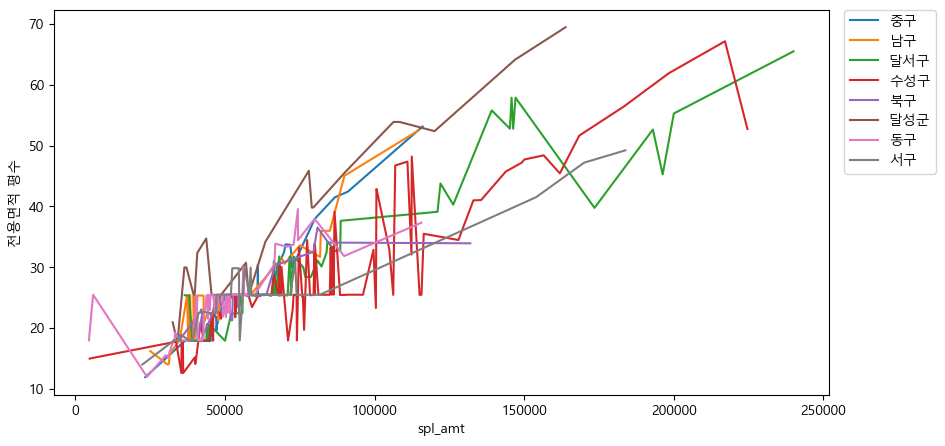

In [65]:
plt.figure(figsize=(10, 5)) # plt.figure -> 기본적으로 자동으로 호출, 특별히 조정할 것이 있을 때 사용igsize = (,) -> 그림 크기 조절
sns.lineplot(data=df_2_daegu, x="spl_amt", y="전용면적 평수", hue="구")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.) # 범례 추가 

In [67]:
df_2_daegu[df_2_daegu['구']=='달성군'].sort_values('전용면적 평수', ascending=False)

,house_nm,spl_loca,spl_scale,model_no,house_stl,splyar,spl_amt,loan_posbl_amt,구,공급면적 평수,전용면적 평수,금액(만원) -- 전용면적/공급면적 평수,금액/전용면적
727,다사역 금호어울림 센트럴,대구광역시 달성군 다사읍 매곡리 521-2번지 일원,869,7,231.5636,304.4730,163820,98292.0,달성군,91.34190,69.46908,163820--69/91,2358.171434
5957,태왕아너스 더힐,대구광역시 달성군 유가읍 초곡리 426번지 일원,69,5,213.7979P,281.3279,146940,88164.0,달성군,84.39837,64.13937,146940--64/84,2290.948601
5961,태왕아너스 더힐,대구광역시 달성군 유가읍 초곡리 426번지 일원,69,4,179.6570P,230.2070,108310,64986.0,달성군,69.06210,53.89710,108310--53/69,2009.570088
5960,태왕아너스 더힐,대구광역시 달성군 유가읍 초곡리 426번지 일원,69,3,179.6570A,179.6570,106300,63780.0,달성군,53.89710,53.89710,106300--53/53,1972.276802
728,다사역 금호어울림 센트럴,대구광역시 달성군 다사읍 매곡리 521-2번지 일원,869,6,174.6081,231.7098,120000,72000.0,달성군,69.51294,52.38243,120000--52/69,2290.844468
2233,대구테크노폴리스 예미지 더 센트럴,대구광역시 달성군 유가읍 봉리 660번지,894,5,152.9318,193.5621,78000,46800.0,달성군,58.06863,45.87954,78000--45/58,1700.104229
2945,화원 동화아이위시,대구광역시 달성군 화원읍 명곡리 230-8번지 일원,568,5,152.0722,214.0872,90100,45050.0,달성군,64.22616,45.62166,90100--45/64,1974.939097
5958,태왕아너스 더힐,대구광역시 달성군 유가읍 초곡리 426번지 일원,69,2,132.7500P,183.3000,79490,47694.0,달성군,54.99000,39.82500,79490--39/54,1995.982423
5959,태왕아너스 더힐,대구광역시 달성군 유가읍 초곡리 426번지 일원,69,1,132.7500A,132.7500,78980,47388.0,달성군,39.82500,39.82500,78980--39/39,1983.176397
2230,대구테크노폴리스 예미지 더 센트럴,대구광역시 달성군 유가읍 봉리 660번지,894,4,115.8207,145.2984,43700,26220.0,달성군,43.58952,34.74621,43700--34/43,1257.691127
